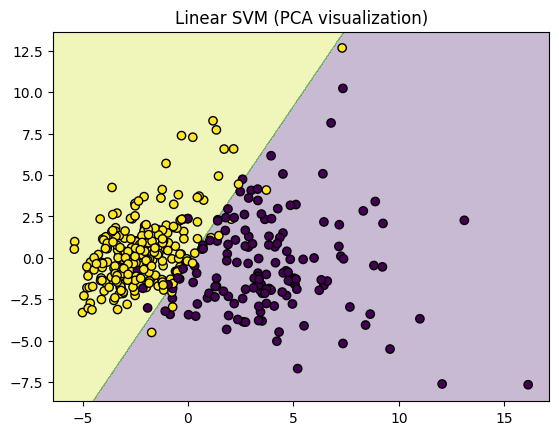

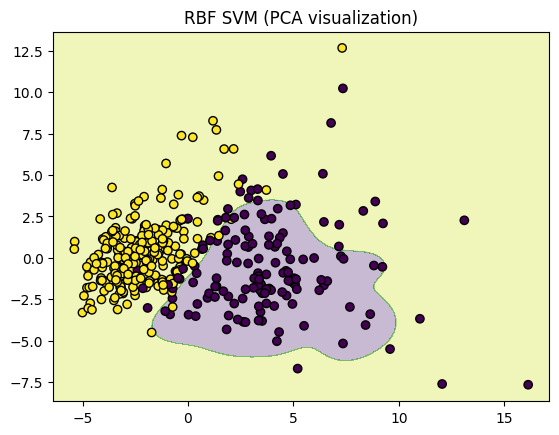

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters from GridSearch: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        63
           1       0.98      1.00      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171


Confusion Matrix:
 [[ 61   2]
 [  0 108]]

Cross-Validation Accuracy: 0.9672784810126581


In [1]:
# Task 7: Support Vector Machines (SVM) with PCA Visualization in Google Colab

# 1. Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

# 2. Load Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. PCA for visualization (2 components)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Helper function to plot decision boundaries in PCA space
def plot_decision_boundary(clf, X_pca, y, title):
    h = .02
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.show()

# 6. Train Linear SVM on full features
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train_scaled, y_train)
plot_decision_boundary(svm_linear, X_train_pca, y_train, "Linear SVM (PCA visualization)")

# 7. Train RBF SVM on full features
svm_rbf = SVC(kernel='rbf', C=1, gamma=0.5)
svm_rbf.fit(X_train_scaled, y_train)
plot_decision_boundary(svm_rbf, X_train_pca, y_train, "RBF SVM (PCA visualization)")

# 8. Hyperparameter tuning (RBF kernel)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters from GridSearch:", grid.best_params_)

# 9. Evaluate tuned model
y_pred = grid.predict(X_test_scaled)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 10. Cross-validation score
scores = cross_val_score(grid.best_estimator_, X_train_scaled, y_train, cv=5)
print("\nCross-Validation Accuracy:", scores.mean())
